In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../backend/src/data/course_evals_data.csv')
df.head()


,dept,division,course,lastName,firstName,term,year,INS1,INS2,INS3,INS4,INS5,INS6,ARTSC1,ARTSC2,ARTSC3,invited,responses
0,AFR,ARTSC,Africa in Toronto AFR199H1-S-LEC0101,Oduro,Alfred,Winter,2025,4.5,4.7,4.8,4.7,4.8,4.6,4.8,2.5,4.6,29.0,20
1,AFR,ARTSC,Africa: 21st Century AFR250Y1-Y-LEC0101,Asubiaro Dada,Wumi,Winter,2025,4.6,4.6,4.4,4.3,4.4,4.7,4.9,3.4,4.9,22.0,7
2,AFR,ARTSC,Africa: 21st Century AFR250Y1-Y-LEC0101,Levin,Melissa,Winter,2025,4.6,4.6,4.7,4.3,4.4,4.7,4.7,3.4,4.9,22.0,7
3,AFR,ARTSC,Africa: Critical Introduction AFR150Y1-Y-LEC0101,Levin,Melissa,Winter,2025,4.8,4.8,4.9,4.6,4.6,4.7,5.0,3.1,4.7,42.0,9
4,AFR,ARTSC,Africa: Critical Introduction AFR150Y1-Y-LEC0101,Wasike,Aggrey,Winter,2025,4.8,4.8,4.4,4.6,4.6,4.7,4.3,3.1,4.7,42.0,9


In [17]:
eval_df = pd.read_csv('../backend/src/data/course_eval_evaluations.csv')

In [18]:
offering_df = pd.read_csv('../backend/src/data/course_eval_offerings.csv')
prof_df = pd.read_csv('../backend/src/data/course_eval_professors.csv')
course_df = pd.read_csv('../backend/src/data/course_eval_courses.csv')

In [19]:
e_o_merge = pd.merge(eval_df, offering_df, how='inner', on='offering_id')
e_o_p_merge = pd.merge(e_o_merge, prof_df, how='inner', on='prof_id')
merged_df = pd.merge(e_o_p_merge, course_df, how='inner', on='course_id')


In [20]:
merged_df.head()

,eval_id,offering_id,ins1,ins2,ins3,ins4,ins5,ins6,artsci1,artsci2,...,prof_id,course_id,section,year,semester,first_name,last_name,department,code,title
0,1,2,4.5,4.7,4.8,4.7,4.8,4.6,4.8,2.5,...,2,2,LEC0101,2025,Winter,Alfred,Oduro,AFR,AFR199H1,Africa in Toronto
1,2,3,4.6,4.6,4.4,4.3,4.4,4.7,4.9,3.4,...,3,3,LEC0101,2025,Winter,Wumi,Asubiaro Dada,AFR,AFR250Y1,Africa: 21st Century
2,3,4,4.6,4.6,4.7,4.3,4.4,4.7,4.7,3.4,...,4,3,LEC0101,2025,Winter,Melissa,Levin,AFR,AFR250Y1,Africa: 21st Century
3,4,5,4.8,4.8,4.9,4.6,4.6,4.7,5.0,3.1,...,4,4,LEC0101,2025,Winter,Melissa,Levin,AFR,AFR150Y1,Africa: Critical Introduction
4,5,6,4.8,4.8,4.4,4.6,4.6,4.7,4.3,3.1,...,5,4,LEC0101,2025,Winter,Aggrey,Wasike,AFR,AFR150Y1,Africa: Critical Introduction


In [21]:
list(df.columns)

['dept',
 'division',
 'course',
 'lastName',
 'firstName',
 'term',
 'year',
 'INS1',
 'INS2',
 'INS3',
 'INS4',
 'INS5',
 'INS6',
 'ARTSC1',
 'ARTSC2',
 'ARTSC3',
 'invited',
 'responses']

In [22]:
prof_gb = df.groupby(['lastName', 'firstName'])[list(df.columns)[7:-2]].agg('mean', 'count')
prof_gb

,,INS1,INS2,INS3,INS4,INS5,INS6,ARTSC1,ARTSC2,ARTSC3
lastName,firstName,,,,,,,,,
AL Janaideh,Redab,4.100000,4.20000,4.600000,4.100000,4.100000,4.000000,4.650000,2.800000,4.150000
Aameri,Bahar,4.094839,4.23871,4.054839,4.209677,4.206452,3.896774,3.864516,3.306452,3.870968
Abbasi,Kianoosh,3.825000,3.97500,3.775000,4.050000,4.025000,3.475000,3.850000,3.900000,3.750000
Abbasloo,Soheil,4.200000,4.40000,4.250000,3.950000,3.650000,3.850000,4.200000,3.400000,3.950000
Abbatt,Jonathan,4.385909,4.45000,4.609091,4.322727,4.295455,4.240909,4.615000,3.050000,4.290909
...,...,...,...,...,...,...,...,...,...,...
van Kerkwijk,Marten,4.275000,4.05000,3.600000,3.550000,3.275000,3.350000,4.366667,4.050000,3.200000
van der Leer Duran,Joey,3.866667,3.95000,4.183333,3.633333,3.650000,3.450000,4.033333,3.500000,3.400000
van der Maas,Mark,4.082500,4.20000,4.350000,4.000000,3.950000,3.975000,4.350000,3.200000,4.050000


In [23]:
prof_gb.describe()

,INS1,INS2,INS3,INS4,INS5,INS6,ARTSC1,ARTSC2,ARTSC3
count,6645.000000,6645.000000,6645.000000,6645.000000,6645.000000,6645.000000,6251.000000,6627.000000,6627.000000
mean,4.095402,4.195304,4.162589,4.000656,4.035303,3.864653,4.227702,3.306477,3.884117
std,0.454624,0.440183,0.558232,0.458201,0.462437,0.566799,0.538404,0.369396,0.570684
min,1.600000,1.700000,1.400000,1.700000,1.800000,1.450000,1.400000,1.400000,1.500000
25%,3.850000,3.950000,3.866667,3.733333,3.761538,3.500000,3.941667,3.066667,3.540213
50%,4.147647,4.266667,4.285366,4.050000,4.098000,3.916667,4.340000,3.280000,3.950000
75%,4.400000,4.500000,4.588889,4.300000,4.366667,4.297222,4.627525,3.500000,4.300000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,5.000000


In [24]:
print(prof_gb['ARTSC1'].idxmin())

('Janosepah', 'Safoura')


In [25]:
print(prof_gb['ARTSC3'].idxmin())

('Nurse', 'Kenneth')


In [26]:
# need make to sql files into each csv files then it would be a lot easier
course_gb = merged_df.groupby(['course_id', 'code'])[list(merged_df.columns)[2:11]].agg('mean', 'count').reset_index()
course_gb

,course_id,code,ins1,ins2,ins3,ins4,ins5,ins6,artsci1,artsci2,artsci3
0,2,AFR199H1,4.500000,4.70,4.800000,4.700000,4.800000,4.600000,4.80,2.500000,4.60
1,3,AFR250Y1,4.780000,4.76,4.780000,4.600000,4.680000,4.820000,4.88,3.160000,4.88
2,4,AFR150Y1,4.640000,4.78,4.760000,4.520000,4.660000,4.640000,4.74,2.940000,4.54
3,5,AFR450Y1,5.000000,5.00,4.900000,4.900000,4.950000,5.000000,4.90,3.600000,5.00
4,6,AFR280Y1,4.483333,4.50,4.433333,4.466667,4.466667,4.266667,4.45,2.966667,4.60
...,...,...,...,...,...,...,...,...,...,...,...
4968,4971,WGS395H1,4.300000,4.20,4.200000,4.100000,4.500000,4.100000,4.50,2.900000,4.20
4969,4972,WGS362H1,4.150000,4.15,4.100000,3.800000,3.900000,3.950000,4.60,3.450000,3.75
4970,4973,WGS363H1,3.600000,3.60,3.700000,3.650000,3.800000,3.300000,3.40,4.100000,3.40
4971,4974,WGS445H1,4.700000,4.80,4.800000,4.700000,4.650000,4.350000,4.90,3.650000,4.65


In [27]:
course_gb[course_gb['code']=='MAT137Y1']

,course_id,code,ins1,ins2,ins3,ins4,ins5,ins6,artsci1,artsci2,artsci3
2628,2631,MAT137Y1,4.110373,4.108209,3.966418,3.81791,3.763433,3.528358,3.992857,3.921212,3.367424


In [30]:
eval_df = pd.read_csv('../backend/src/data/course_eval_evaluations.csv')
offering_df = pd.read_csv('../backend/src/data/course_eval_offerings.csv')
prof_df = pd.read_csv('../backend/src/data/course_eval_professors.csv')
course_df = pd.read_csv('../backend/src/data/course_eval_courses.csv')
e_o_merge = pd.merge(eval_df, offering_df, how='inner', on='offering_id')
e_o_p_merge = pd.merge(e_o_merge, prof_df, how='inner', on='prof_id')
merged_df = pd.merge(e_o_p_merge, course_df, how='inner', on='course_id')
merged_df['artsci1'] = merged_df['artsci1'].fillna(merged_df['artsci1'].mean())
merged_df = merged_df.dropna(subset=['artsci3', 'artsci2', 'ins3'])
merged_df.columns

Index(['eval_id', 'offering_id', 'ins1', 'ins2', 'ins3', 'ins4', 'ins5',
       'ins6', 'artsci1', 'artsci2', 'artsci3', 'invited', 'responded',
       'prof_id', 'course_id', 'section', 'year', 'semester', 'first_name',
       'last_name', 'department', 'code', 'title'],
      dtype='object')

In [ ]:

# Select your features (the predictors, not artsci3)
features = merged_df[['ins1', 'ins2', 'ins3', 'ins4', 'ins5', 'ins6', 'artsci1', 'artsci2']]

# Compute correlation matrix (Pearson by default)
corr_matrix = features.corr()
print(corr_matrix)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Features (without target)
X = merged_df[['ins1', 'ins2', 'ins3', 'ins4', 'ins5', 'ins6', 'artsci1', 'artsci2']]

# Add constant (required for VIF)
X_const = add_constant(X)

# Compute VIF for each column
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(vif_data)

Variance Inflation Indicator (VIF) measures how much a single predictor is linearly predictable from all other features combined.  
let $f = f_1, ..., f_n \in R^n$ be the features  
$VIF_i$ = $\frac{1}{1-R^2_i}$, where $R^2_i$ is the $R^2$ for regressing $f_1, ... f_{i-1}, f_{i+1}, ..., f_n \: \text{on} \: f_i$  
A $VIF_i$ value of greater than 5 suggests that $f_i$ can be almost explained by the other variables, suggesting high multicollinearity.



## Creating Response Rate column

In [41]:
merged_df["response_rate"] = np.where(merged_df["responded"]!= 0, merged_df["responded"] / merged_df["invited"], np.nan).round(2)
merged_df[["invited", "responded", "response_rate"]]

,invited,responded,response_rate
0,29.0,20,0.69
1,22.0,7,0.32
2,22.0,7,0.32
3,42.0,9,0.21
4,42.0,9,0.21
...,...,...,...
44020,37.0,10,0.27
44021,51.0,22,0.43
44022,19.0,9,0.47
44023,52.0,10,0.19


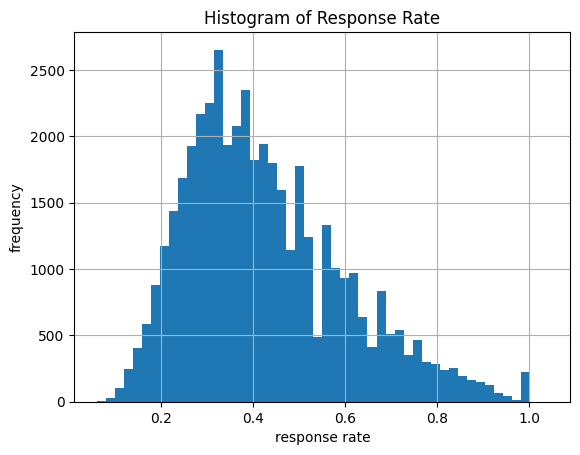

In [50]:
merged_df["response_rate"].hist(bins=50)
plt.ylabel("frequency")
plt.xlabel("response rate")
plt.title("Histogram of Response Rate")
plt.show()